# Random Number Generation on a Quantum Computer
Introduction: The purpose of this practice is to generate 500 random numbers between 0 and 7 using quantum measurements on a quantum computer. Before starting, you should have accessed the IBM Cloud console in a web browser and generated an API key. This key must be used only by you/your jobs. The description on how to do it is in the pdf script. When you have it, please proceed. 

### PREAMBLE: loading packages

In [1]:
# PREAMBLE 
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

Please copy your   token/API-key    number here (to generate it see instructions in the pdf)

In [2]:
with open('token.txt', 'r') as f:
    My_user_token = f.read() # Use this at home (long waiting time)

### Preparation of the circuit
The generation of random numbers using a classical simulator of a quantum machine was conducted during the second session. Now, let's generate "true random numbers"! To achieve this, we define a 3-qubit circuit that prepares each of them in the superposition $\tfrac{1}{\sqrt2}(|0\rangle+|1\rangle)$ and measures them in the computational basis ${|0\rangle,|1\rangle}$. This setup ensures that the measurement outcomes will be 0 or 1 with equal probabilities of 0.5.

#### <font color=teal> **Question 1**: Study the definition of the circuit with care </font>

In [3]:
#How many random numbers will be produced in a single shot:
Nnumbers=30  #must be smaller than [127 qubits/3]=42
# Prepare the input circuit.
QRNG = QuantumCircuit(3*Nnumbers) #four qubits
for j in range(Nnumbers):
  QRNG.h([(3*j+0),(3*j+1),(3*j+2)]) #apply Hadamard gate to each of the qubits

QRNG.measure_all() #measure all qubits
#QRNG.draw(output="mpl") #plot circuit: don't do it with many qubits

### Run the quantum circuit on a quantum machine

In the lab sesion we used premium accounts to fast forward over the long queue list of IBM's quantum machines##### Defining the quantum backend. If waiting time is not a problem, free accounts also give access to real quantum devices.

##### Defining the quantum backend

We need to change the token to the one associated to the UCM account

In [4]:
with open('token.txt', 'r') as f:
    My_UCMIBMuser_token = f.read()

In [32]:
# Quantum machine
Quantum_service = QiskitRuntimeService(channel="ibm_cloud",channel_strategy='q-ctrl',token=My_UCMIBMuser_token,instance="crn:v1:bluemix:public:quantum-computing:us-east:a/83fec30047ef464aaab4e69510a7aa89:1daf4417-d740-41a1-83af-d58977e3e4ac::")

First we have to choose one of the available machines: we let the system do it with some requirements

In [33]:
#First option: choose the least busy machine
backend_Q = Quantum_service.least_busy(operational=True, simulator=False, min_num_qubits=20)
#Second option: 
#backend_Q = Quantum_service.get_backend("ibm_brisbane")
#backend_Q = Quantum_service.get_backend("ibm_osaka")
#backend_Q = Quantum_service.get_backend("ibm_kyoto")

In [34]:
backend_Q.status()

In [35]:
# Create the options object with attributes and values
options = {"max_execution_time": 30} #maximum number of seconds that we allow this to run
# Number of shots (repetitions of the job)
shots_Q=1
sampler = Sampler(backend=backend_Q,options=options) #to specify that we are going to make a sampling of the measurement


C:\Users\zapat\AppData\Local\Temp\ipykernel_6168\3535299096.py:5: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(backend=backend_Q,options=options) #to specify that we are going to make a sampling of the measurement


##### Sending jobs to the machine <br>
<font color="red"> Executing the following cell will cause a charge on your free monthly time allotment, currently 10 min. courtesy of IBM</font>

In [36]:
# Execute the circuit
job = sampler.run([QRNG],shots=shots_Q)


qctrl._warn_and_clean_options:WARNING:2024-04-19 15:58:20,978: The following settings cannot be customized and will be overwritten: approximation_degree,optimization_level


##### Checking job state

In [40]:
# The following cell gives information about the job
job.status() # Status

<JobStatus.DONE: 'job has successfully run'>

In [41]:
job.job_id() # Identification code

'coh7gvdbikarkot73cfg'

The next statement can put your session on hold until the job runs and returns, do no click until the job actually executed, which you can check in https://quantum.ibm.com/jobs

In [42]:
result = job.result()

### Once the calculation is finished, we print the relative frequency and the histogram of each of the numbers (the output is in decimal form)

In [43]:
print(result.quasi_dists)
#plot_histogram(result.quasi_dists)

[{494891568067515481622227972: 1.0}]


We need to extract the numbers from 0 to 7 from that random number, for which we use the remainders of the subsequent divisions by 8 in a loop.

In [44]:
Auxnumberlist = list(result.quasi_dists[0].keys())
Auxnumber=Auxnumberlist[0]  #now we have isolated the number
aux = Auxnumber
Listofrandomnumbers = []  #empty list which will contain the random numbers

In [45]:
while aux>8:  #when the condition fails, aux will be the last of the random numbers
    quotientremainder = divmod(aux,8) #while the condition is true, the remainder is the next random number
    # Alternative not using the built-in divmod function
    # newnumber = aux % 8 #remainder of dividing by 8 so we extract three bits from aux
    # aux = aux//8  #division without remainder
    newnumber = quotientremainder[1]
    aux = quotientremainder[0]
    Listofrandomnumbers.append(newnumber) # we put them in a list
Listofrandomnumbers.append(aux) #append the last one and finish
print(Listofrandomnumbers)


[4, 0, 0, 6, 2, 5, 3, 5, 5, 6, 3, 7, 4, 3, 7, 3, 4, 0, 6, 4, 2, 3, 7, 2, 5, 3, 5, 4, 1, 3]


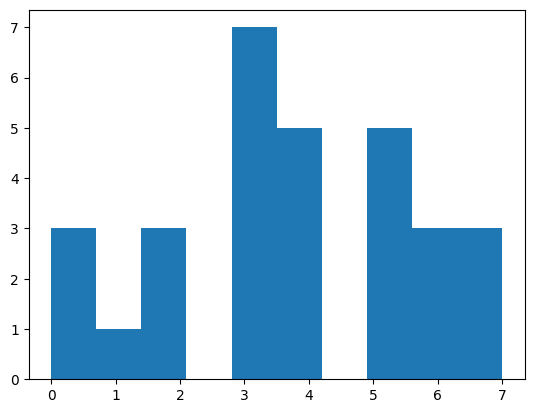

In [46]:
from matplotlib import pyplot as plt
plt.hist(Listofrandomnumbers, 10)
plt.show()

#### <font color=teal> **Question 2**:  Comment on your results </font>

### Congratulations! You have completed your first quantum experiment!